In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Load the dataset
file_path = r"C:\Users\RSMre\OneDrive\Desktop\Year 4 Semester 2\Machine Intelligence\Data\MA4829_ALL_10.xlsm"
df = pd.read_excel(file_path, sheet_name=0)
float_columns_df = pd.DataFrame()

# Preprocess the data: Fill missing values with 0
numerical_data = df.select_dtypes(include=[np.number]).fillna(0)

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Apply PCA
pca = PCA(n_components=2)  # Adjust n_components based on your needs
principal_components = pca.fit_transform(numerical_data)

# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Display the first few rows of the principal components and the explained variance
print(pc_df.head())
print(f'Explained Variance Ratio: {explained_variance}')

   Principal Component 1  Principal Component 2
0              -0.401926               0.773029
1               1.867535              -0.001173
2              -1.657648              -0.308567
3               1.539977              -0.746977
4               0.197122              -0.724464
Explained Variance Ratio: [0.11122077 0.09537751]


In [17]:
numerical_data

,Price,Functionality,Size,Customisable options,Brand name,Aesthetics,Technological features,Sustainability/environment considerations,Grilles,Wheels,...,Personalisation Budget: over 1000,Personalisation Budget: 0,Customisation likelihood: Likely,Customisation likelihood: Very likely,Customisation likelihood: Not likely,Interest in personalising car components: Only with professional help,Interest in personalising car components: Yes,Interest in personalising car components: No,"3D design experience: No, I would need a designer to model my sketch","3D design experience: Yes, I can design on my own"
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
5,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
7,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
8,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


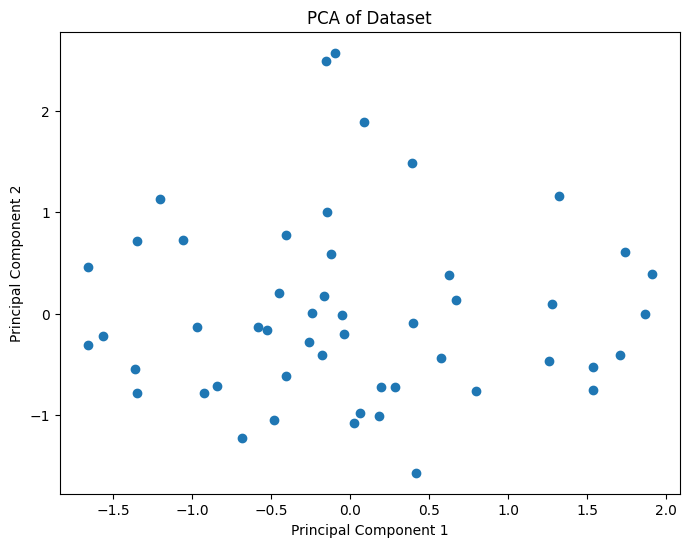

In [18]:
# Example: Plotting the principal components (if you want to visualize the results)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(pc_df['Principal Component 1'], pc_df['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.show()

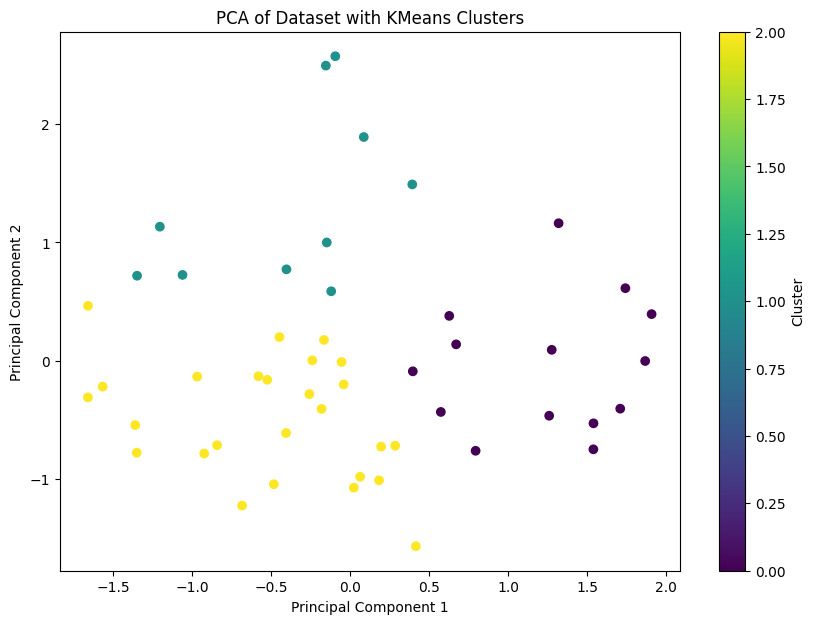

In [19]:
from sklearn.cluster import KMeans

# Perform KMeans Clustering on the PCA results
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters as per your analysis needs
clusters = kmeans.fit_predict(pc_df)

# Add the cluster labels to your pc_df
pc_df['Cluster'] = clusters

# Visualizing the PCA-transformed data with cluster labels
plt.figure(figsize=(10, 7))
plt.scatter(pc_df['Principal Component 1'], pc_df['Principal Component 2'], c=pc_df['Cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset with KMeans Clusters')
plt.colorbar(label='Cluster')
plt.show()

# This plot will show the data points colored by their cluster assignments,
# allowing you to observe how well the PCA transformation has facilitated clustering.


In [20]:
# Recalculate PCA without specifying n_components to include all, if necessary
# Only do this if you need to extend the analysis beyond the first 2 components
pca_complete = PCA()
principal_components_complete = pca_complete.fit_transform(scaled_data)

# Recalculate cumulative variance with the complete PCA
cumulative_variance_complete = np.cumsum(pca_complete.explained_variance_ratio_)

# Re-find the number of components for 80% variance with the complete PCA
components_for_80_variance_complete = np.where(cumulative_variance_complete >= 0.8)[0][0] + 1

# Re-extract loadings for the first 18 components with the complete PCA
loadings = pd.DataFrame(pca_complete.components_[:18].T, index=numerical_data.columns, columns=[f'PC{i+1}' for i in range(18)])

# Display the recalculated number of components to explain 80% variance and their loadings with the complete PCA
print(f"Number of components to explain 80% of variance with complete PCA: {components_for_80_variance_complete}")
print("Loadings for the first 18 components with complete PCA:")
print(loadings)

# Note: This approach assumes you're extending the initial analysis to consider more than the first 2 components.
# If your initial analysis already covers your needs, simply proceed with interpreting the results without re-executing PCA.

Number of components to explain 80% of variance with complete PCA: 18
Loadings for the first 18 components with complete PCA:
                                                         PC1       PC2  \
Price                                               0.129508  0.157165   
Functionality                                      -0.013142  0.065614   
Size                                                0.077436  0.057412   
Customisable options                                0.071618 -0.046521   
Brand name                                          0.026705  0.180741   
Aesthetics                                          0.015838  0.107408   
Technological features                             -0.087803  0.112979   
Sustainability/environment considerations           0.092248  0.032507   
Grilles                                             0.143535  0.011475   
Wheels                                             -0.021230 -0.008556   
Headlights                                         -0.029620

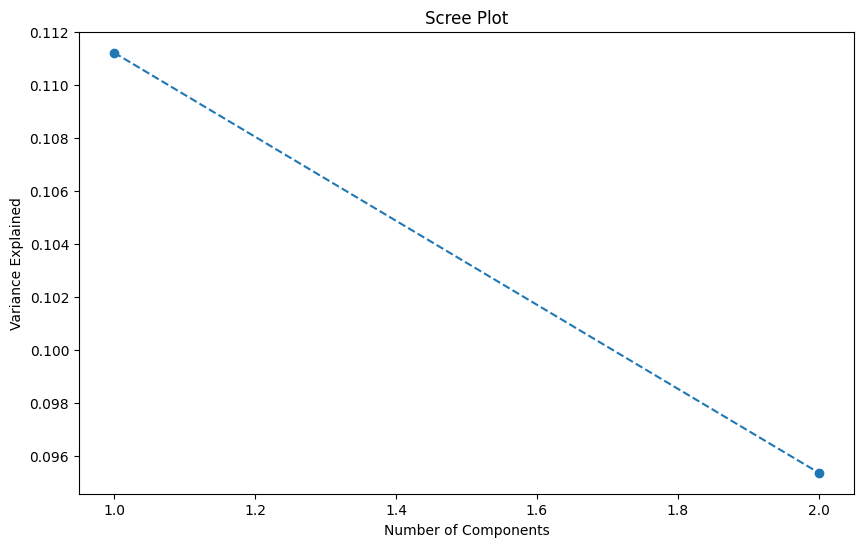

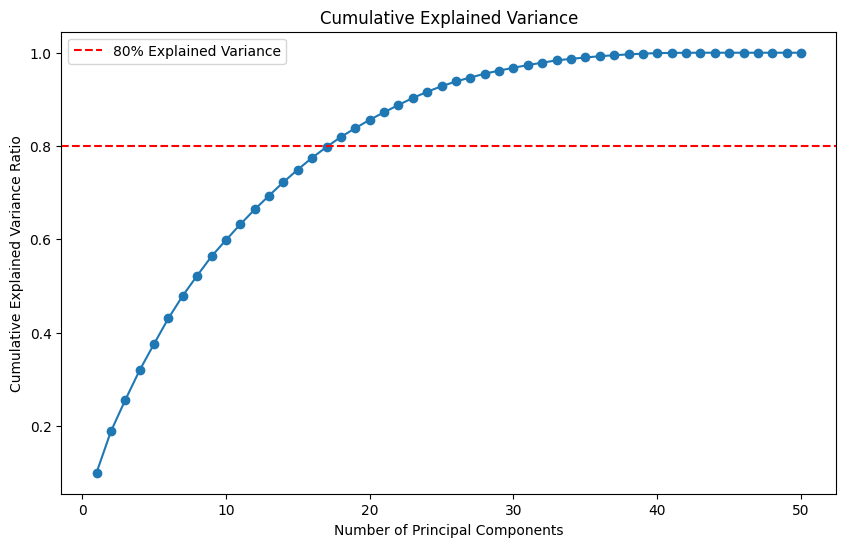

C:\Users\RSMre\AppData\Local\Temp\ipykernel_18164\2949736871.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(loadings_plot['PC1'][i], loadings_plot['PC2'][i], text)


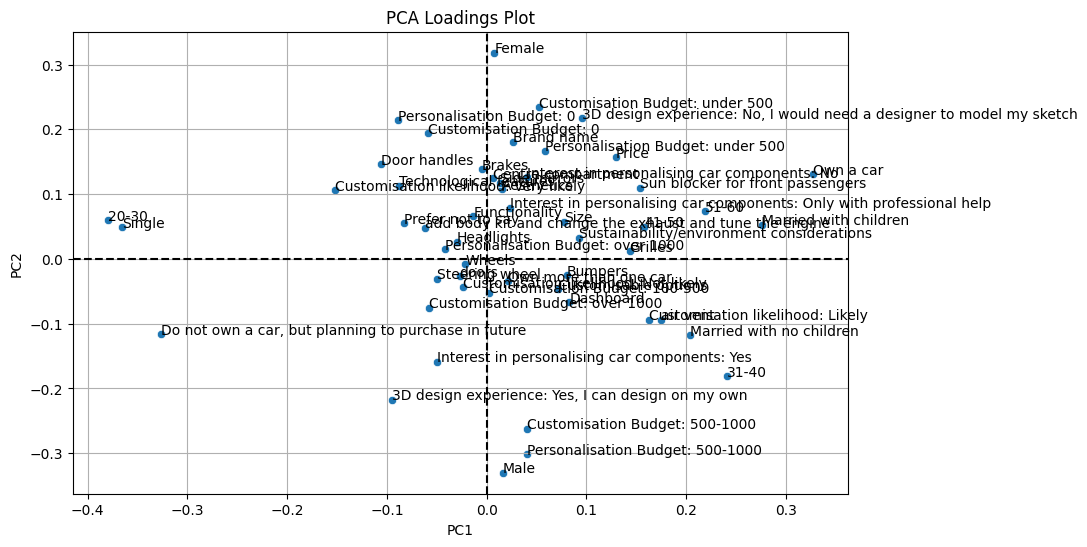

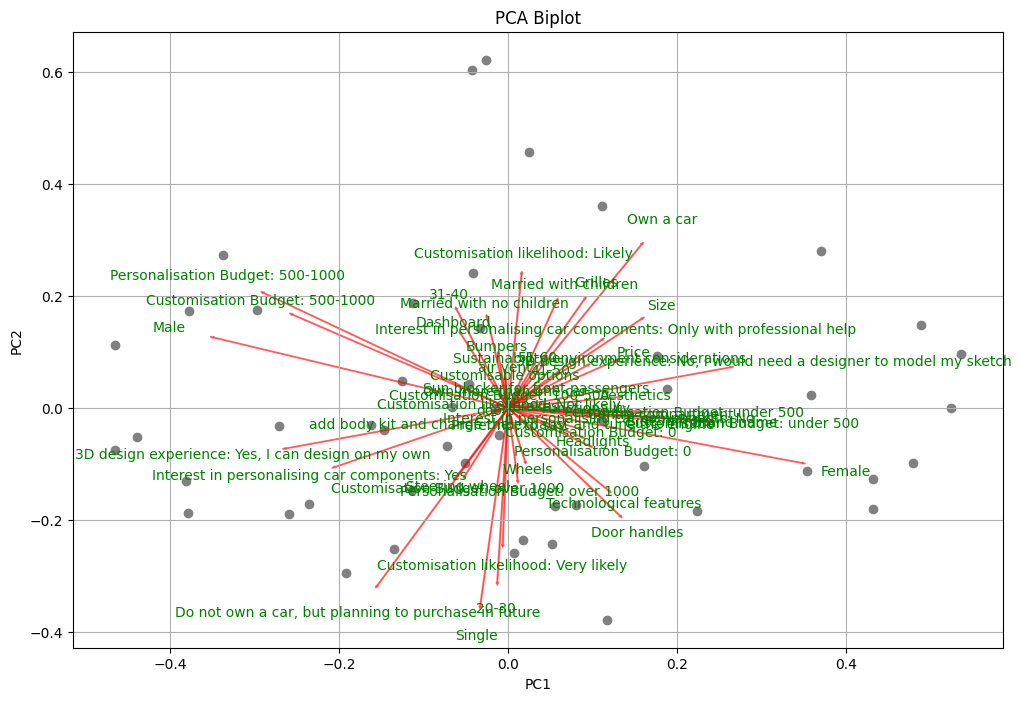

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.show()

# 3. Cumulative Explained Variance Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_complete) + 1), cumulative_variance_complete, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Explained Variance')
plt.legend()
plt.show()

# 2. PCA Loadings Plot for the first two components
plt.figure(figsize=(10, 6))
loadings_plot = loadings.iloc[:, :2]
sns.scatterplot(x=loadings_plot['PC1'], y=loadings_plot['PC2'])
for i, text in enumerate(loadings_plot.index):
    plt.text(loadings_plot['PC1'][i], loadings_plot['PC2'][i], text)
plt.title('PCA Loadings Plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')
plt.grid(True)
plt.show()

# 3. Biplot (for the first two principal components)
def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    plt.scatter(xs * scalex, ys * scaley, c = 'gray')
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color='red',alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, "Var"+str(i+1), color='green', ha='center', va='center')
        else:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, labels[i], color='g', ha='center', va='center')
    
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

# Call the biplot function
plt.figure(figsize=(12, 8))
biplot(principal_components[:, :2], np.transpose(pca.components_[0:2, :]), labels=numerical_data.columns)
plt.title('PCA Biplot')
plt.show()

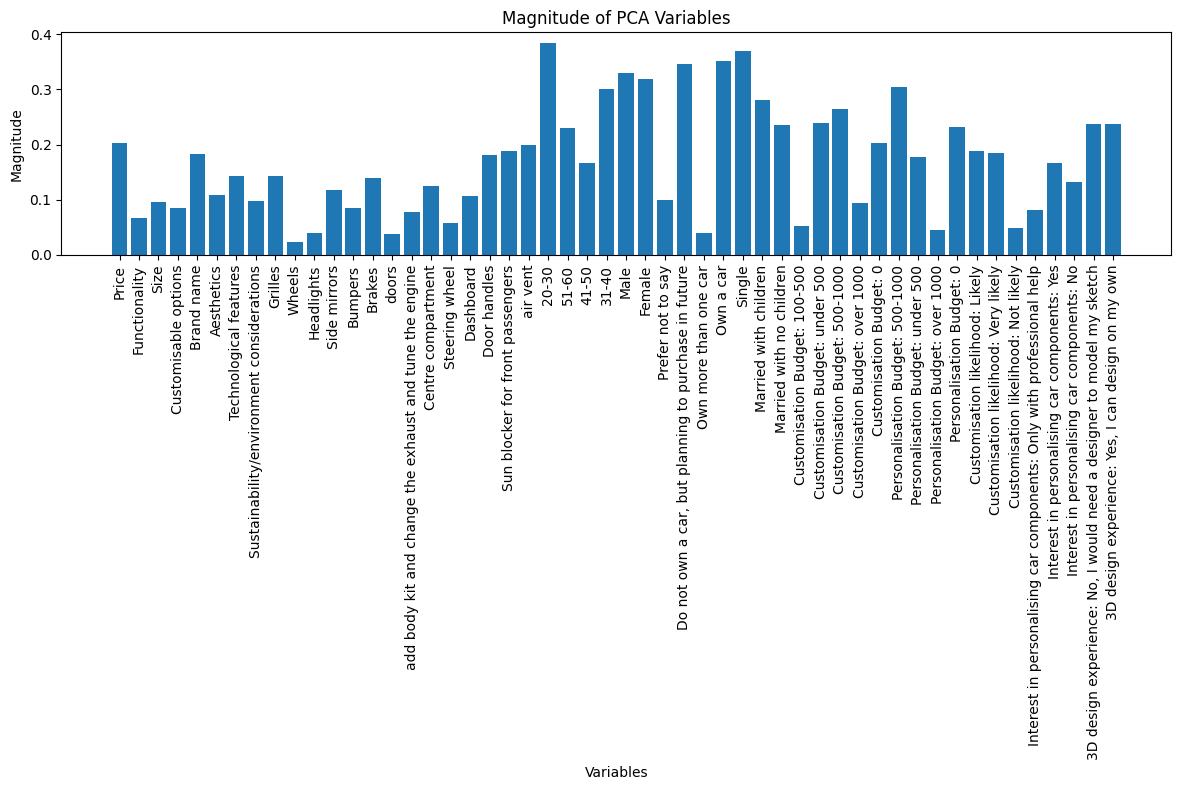

In [22]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming X is your dataset
# Step 1: Standardize the dataset
X_standardized = StandardScaler().fit_transform(numerical_data)
variable_names = numerical_data.columns.tolist()

# Perform PCA
pca = PCA(n_components=2)  # Adjust n_components as needed
X_pca = pca.fit_transform(X_standardized)

# Calculate the magnitude of the loadings
loadings = pca.components_.T  # Transpose to get variables on rows
magnitudes = np.sqrt(np.sum(loadings**2, axis=1))

# Plotting the magnitudes with variable names
plt.figure(figsize=(12, 8))
plt.bar(range(len(variable_names)), magnitudes, tick_label=variable_names)
plt.xticks(rotation=90)  # Rotate variable names for better readability
plt.xlabel('Variables')
plt.ylabel('Magnitude')
plt.title('Magnitude of PCA Variables')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

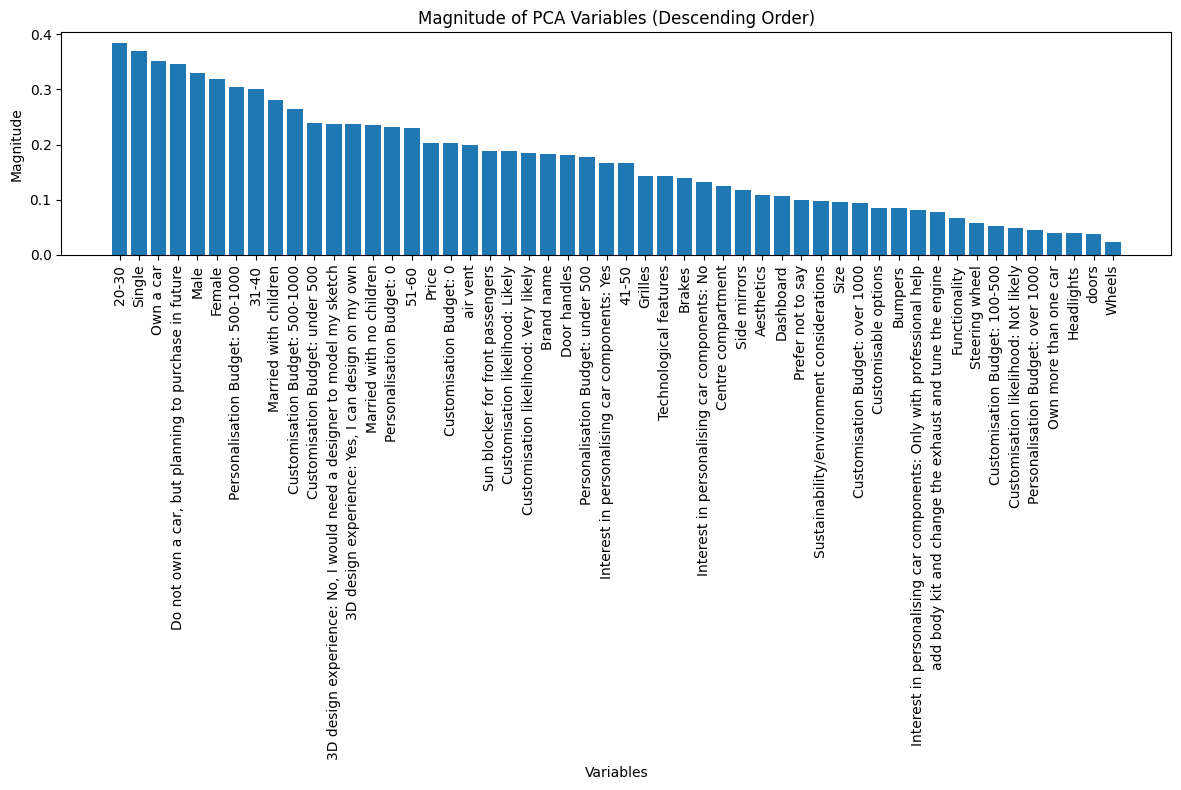

In [23]:
# Create a DataFrame from magnitudes and variable names for sorting
magnitudes_df = pd.DataFrame({'Variable': variable_names, 'Magnitude': magnitudes})

# Sort the DataFrame by 'Magnitude' in descending order
magnitudes_df_sorted = magnitudes_df.sort_values(by='Magnitude', ascending=False)

# Plotting the magnitudes in descending order
plt.figure(figsize=(12, 8))
plt.bar(magnitudes_df_sorted['Variable'], magnitudes_df_sorted['Magnitude'])
plt.xticks(rotation=90)  # Rotate variable names for better readability
plt.xlabel('Variables')
plt.ylabel('Magnitude')
plt.title('Magnitude of PCA Variables (Descending Order)')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

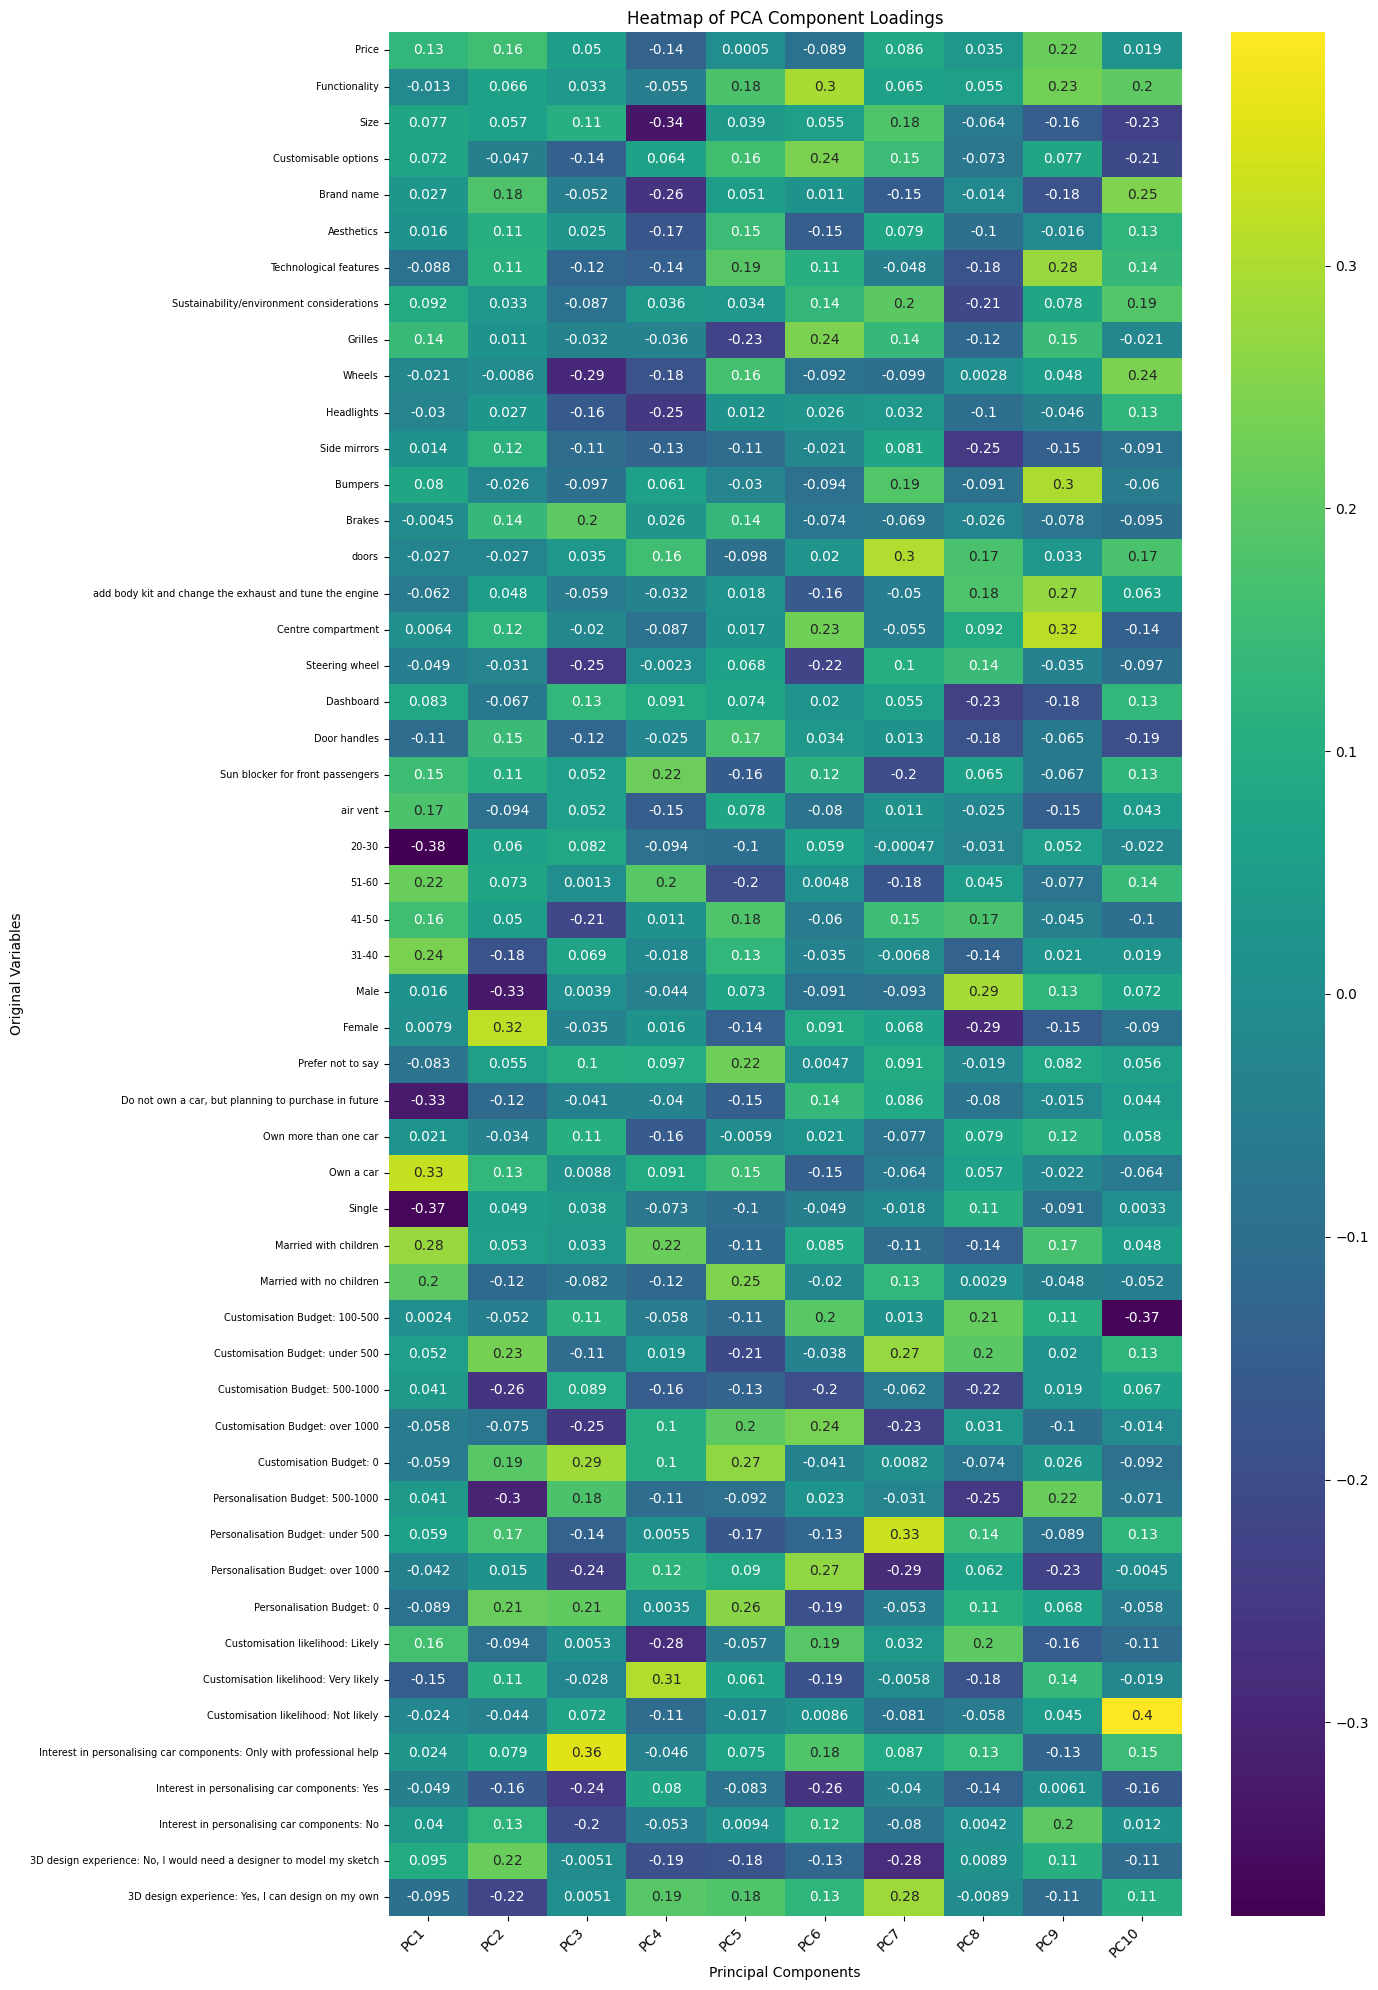

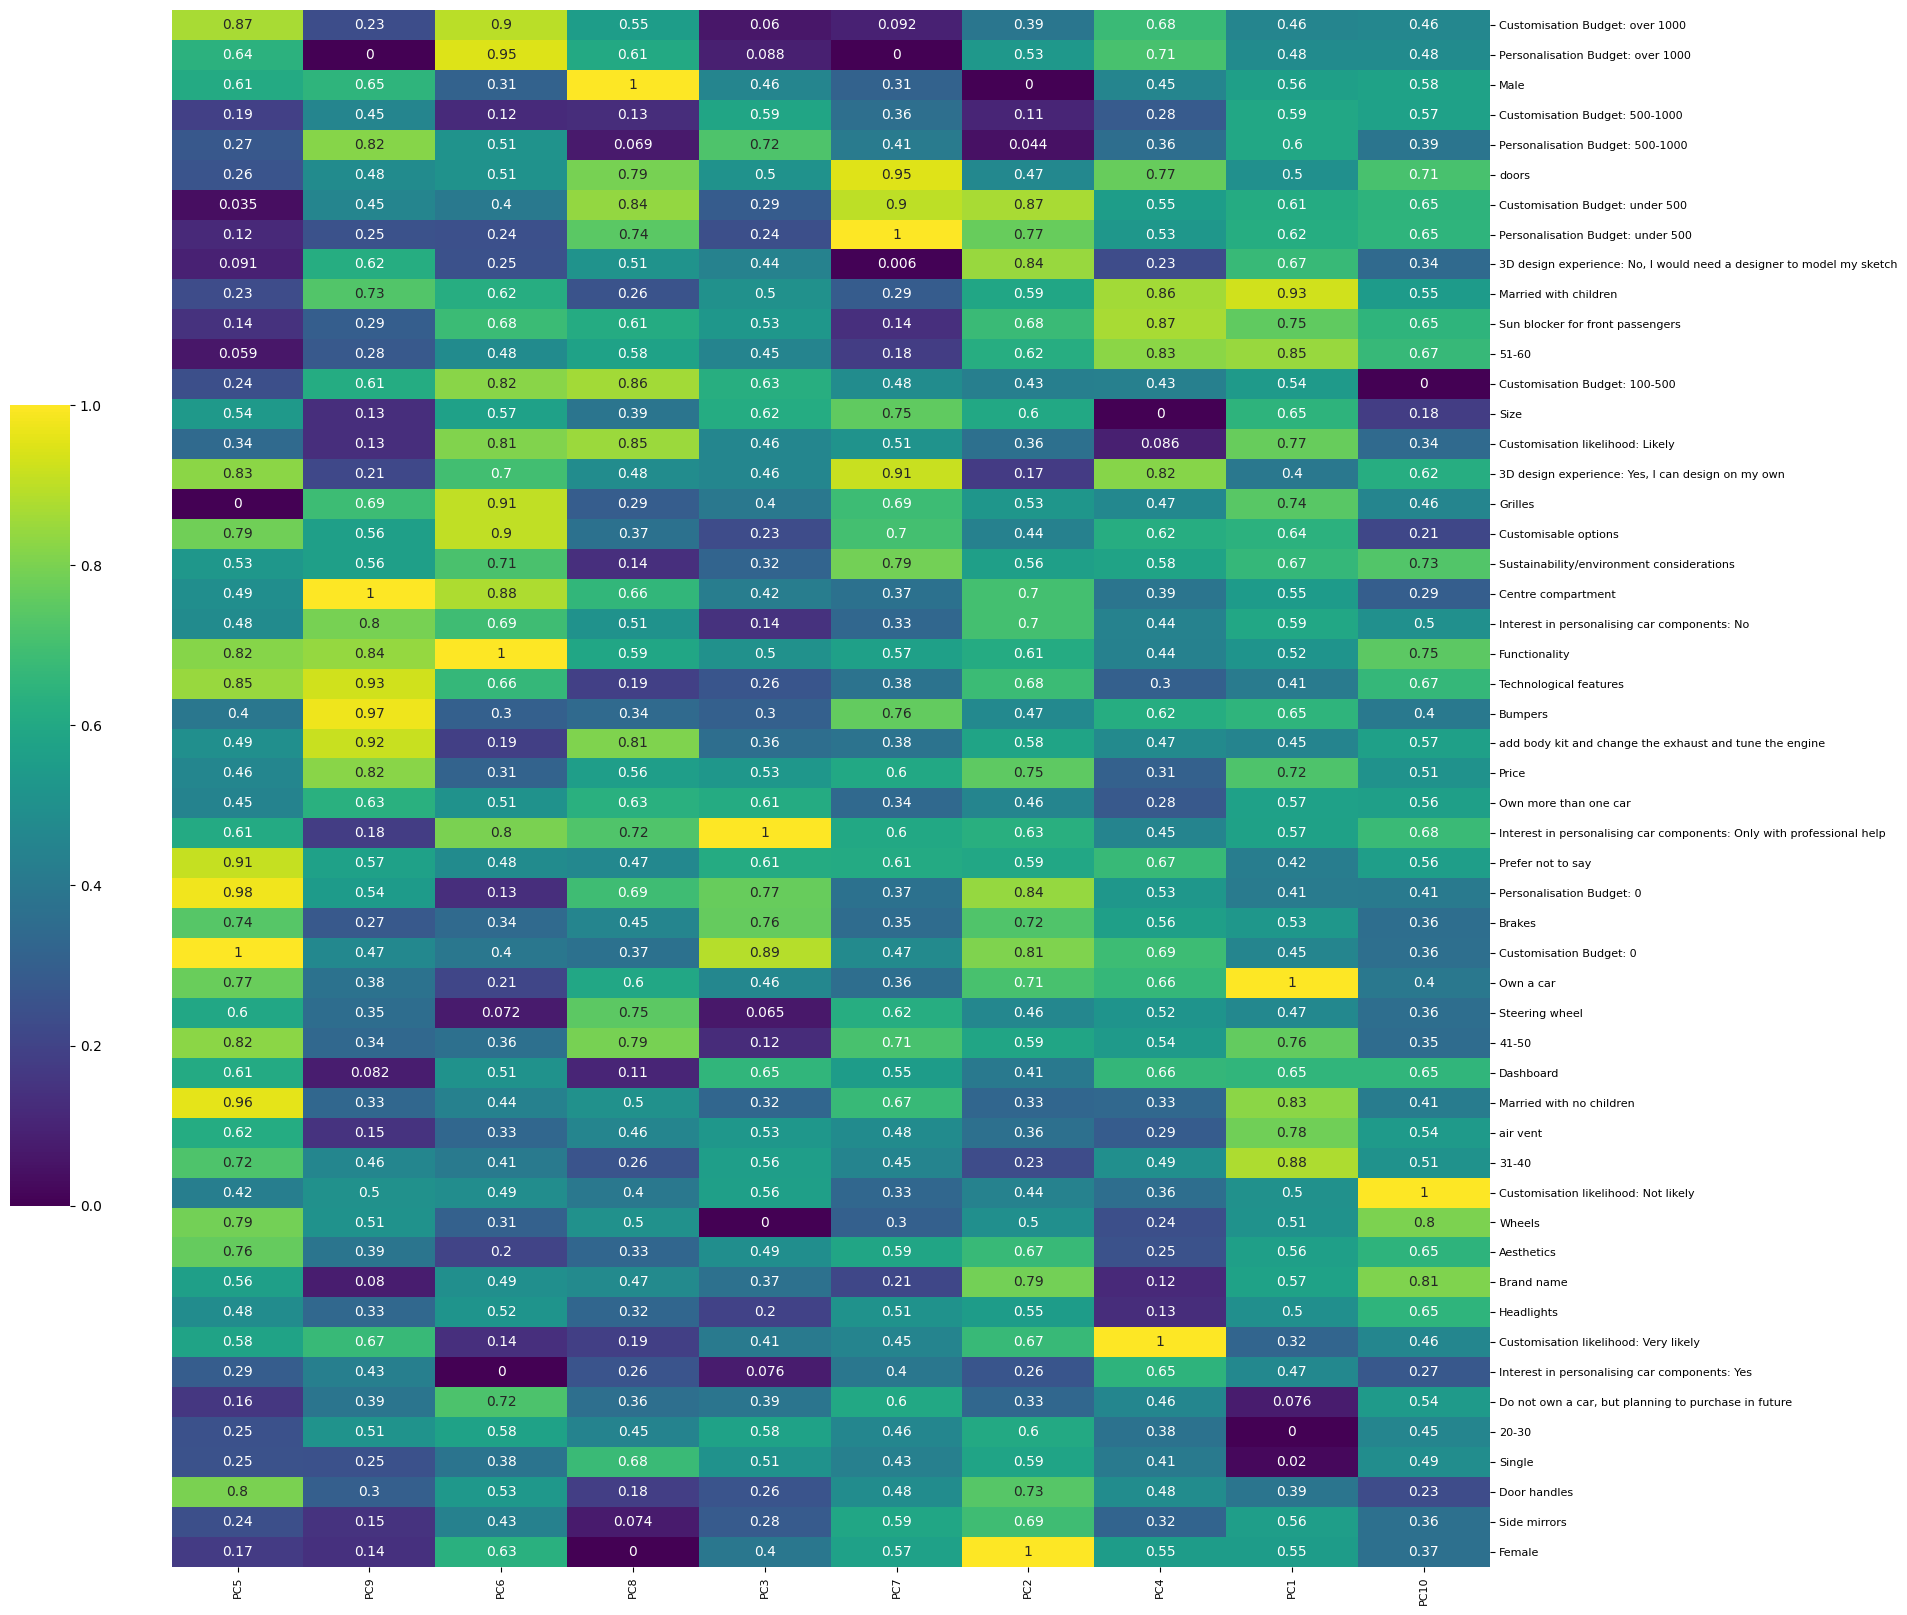

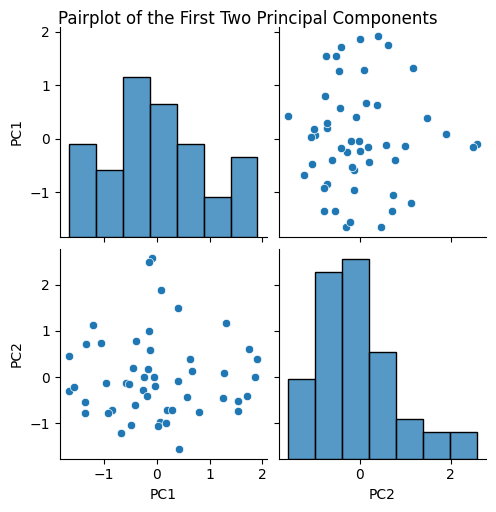

In [9]:
# Assuming the previous variables and PCA results are still in scope

# 1. Heatmap of Component Loadings
plt.figure(figsize=(14, 20))
ax = sns.heatmap(loadings.iloc[:, :10], cmap='viridis', annot=True)
plt.title('Heatmap of PCA Component Loadings')
plt.xlabel('Principal Components')
plt.ylabel('Original Variables')
# Adjustments for improving readability
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better fit
plt.yticks(rotation=0, fontsize=7)  # Adjust font size of y-axis labels
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

# 2. Clustermap
# Adjusting the clustermap size and font size directly in the sns.clustermap() function call
clustermap_fig = sns.clustermap(loadings.iloc[:, :10], cmap='viridis', standard_scale=1, figsize=(20, 20), annot=True, dendrogram_ratio=(.1, .2), cbar_pos=(0, .2, .03, .4))
# To adjust the font size of the labels in the dendrogram, use the `dendrogram_ratio` and `cbar_pos` to make space as needed
clustermap_fig.ax_row_dendrogram.set_visible(False)  # Optionally hide the row dendrogram if space is an issue
clustermap_fig.ax_col_dendrogram.set_visible(False)  # Optionally hide the column dendrogram if space is an issue
# Adjust font size for the heatmap labels (if the above doesn't make them visible or if you need larger text)
plt.setp(clustermap_fig.ax_heatmap.yaxis.get_majorticklabels(), fontsize=8)  # Adjust y-axis labels font size
plt.setp(clustermap_fig.ax_heatmap.xaxis.get_majorticklabels(), fontsize=8, rotation=90)  # Adjust x-axis labels font size and rotation
plt.show()

# 3. Pairplot of the First Few Principal Components
# Note: For large datasets, consider sampling to speed up this plot
sns.pairplot(pd.DataFrame(principal_components[:, :4], columns=['PC1', 'PC2']))
plt.suptitle('Pairplot of the First Two Principal Components', verticalalignment='baseline')
plt.show()

In [10]:
# Extract the loadings (components_)
loadings = pd.DataFrame(pca_complete.components_.T, columns=[f'PC{i+1}' for i in range(pca_complete.n_components_)], index=numerical_data.columns)

# Display the loadings for the first few principal components
print("Loadings for the Principal Components:")
print(loadings.iloc[:, :5])  # Adjust the number of components you wish to view

Loadings for the Principal Components:
                                                         PC1       PC2  \
Price                                               0.129508  0.157165   
Functionality                                      -0.013142  0.065614   
Size                                                0.077436  0.057412   
Customisable options                                0.071618 -0.046521   
Brand name                                          0.026705  0.180741   
Aesthetics                                          0.015838  0.107408   
Technological features                             -0.087803  0.112979   
Sustainability/environment considerations           0.092248  0.032507   
Grilles                                             0.143535  0.011475   
Wheels                                             -0.021230 -0.008556   
Headlights                                         -0.029620  0.026557   
Side mirrors                                        0.013579  0.117694   

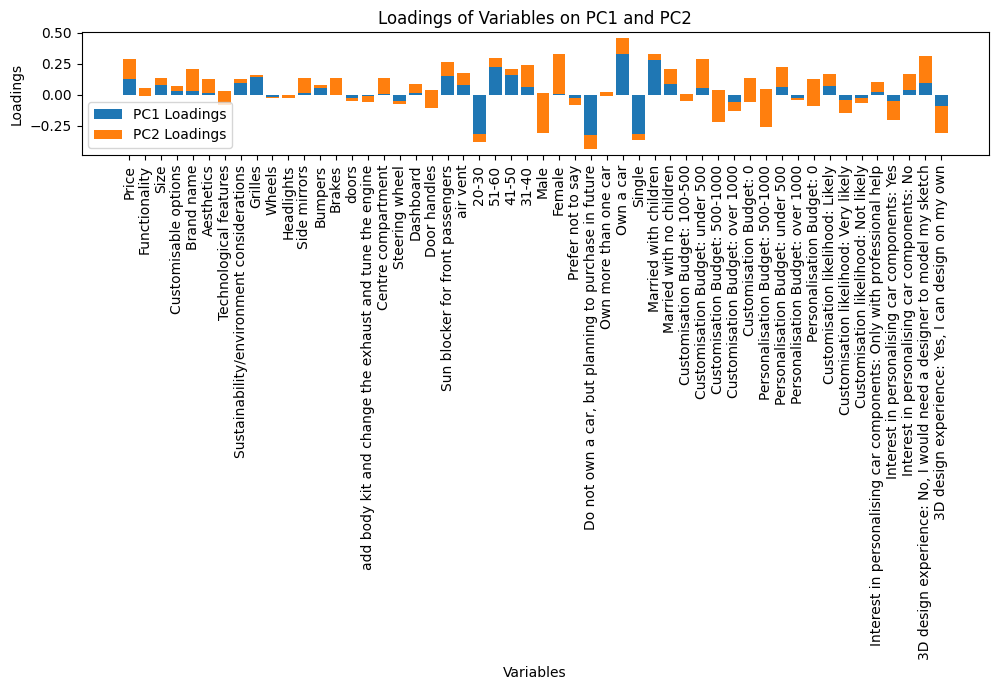

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.bar(loadings.index, loadings['PC1'], label='PC1 Loadings')
plt.bar(loadings.index, loadings['PC2'], bottom=loadings['PC1'], label='PC2 Loadings')
plt.xticks(rotation=90)
plt.ylabel('Loadings')
plt.xlabel('Variables')
plt.title('Loadings of Variables on PC1 and PC2')
plt.legend()
plt.tight_layout()
plt.show()

# Rerun of code with new cleaned data

In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Load the dataset
file_path = r"C:\Users\RSMre\OneDrive\Desktop\Year 4 Semester 2\Machine Intelligence\Data\MA4829_PCA_DATA.xlsx"
df = pd.read_excel(file_path, sheet_name=0)
float_columns_df = pd.DataFrame()

# Preprocess the data: Fill missing values with 0
numerical_data = df.select_dtypes(include=[np.number]).fillna(0)
numerical_data.head()

,Age (PCA),Gender (PCA),Ownership (PCA),Marital Status (PCA),Customisation Likelihood (PCA),Customisation Budget (PCA),Personalisation Interest (PCA),Personalisation Budget (PCA),3D Design Experience (PCA)
0,0,0,0,0,1,1,2,2,0
1,0,1,0,0,1,1,2,1,0
2,0,0,0,0,2,2,1,2,1
3,0,1,0,0,2,1,1,1,0
4,0,0,0,0,2,3,2,3,0


In [28]:
# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Apply PCA
pca = PCA(n_components=2)  # Adjust n_components based on your needs
principal_components = pca.fit_transform(numerical_data)

# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Display the first few rows of the principal components and the explained variance
print(pc_df.head())
print(f'Explained Variance Ratio: {explained_variance}')

   Principal Component 1  Principal Component 2
0               0.325118              -0.428525
1               1.140691              -0.425816
2              -0.536487              -0.634679
3               1.033650              -0.463340
4              -1.664497              -0.676636
Explained Variance Ratio: [0.38728808 0.22625248]


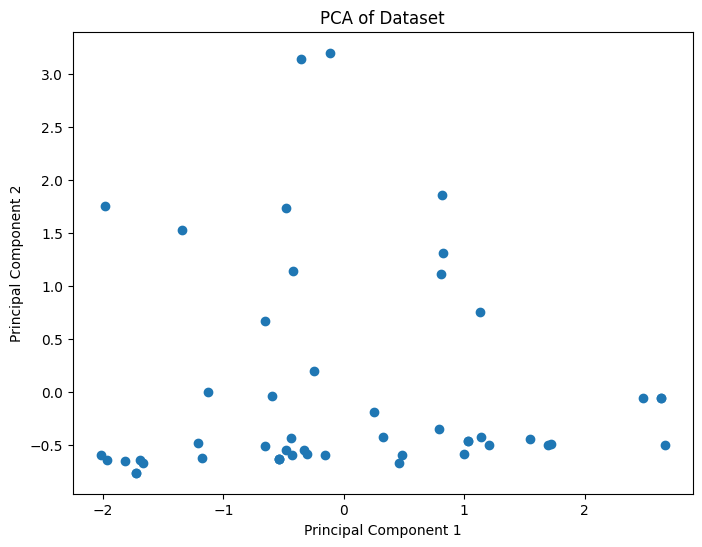

In [29]:
# Example: Plotting the principal components (if you want to visualize the results)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(pc_df['Principal Component 1'], pc_df['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.show()

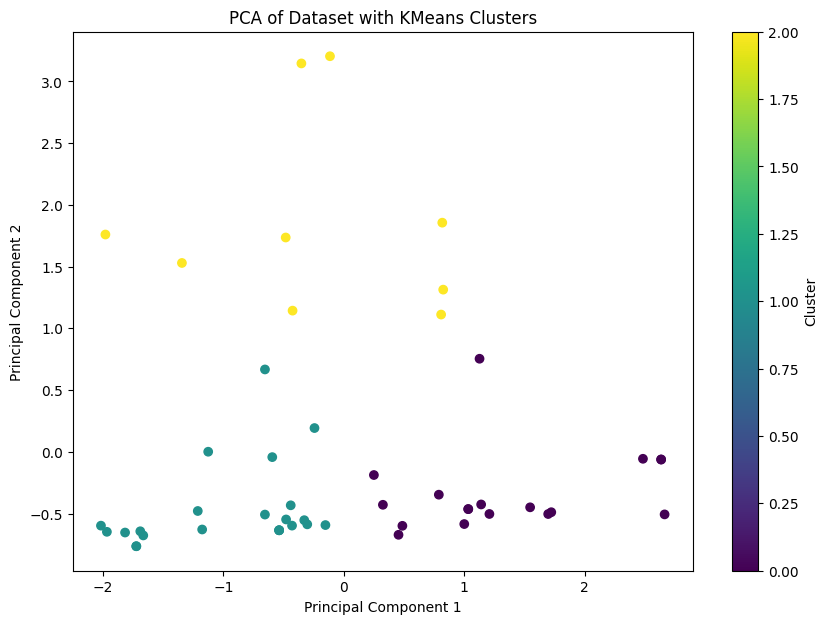

In [30]:
from sklearn.cluster import KMeans

# Perform KMeans Clustering on the PCA results
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters as per your analysis needs
clusters = kmeans.fit_predict(pc_df)

# Add the cluster labels to your pc_df
pc_df['Cluster'] = clusters

# Visualizing the PCA-transformed data with cluster labels
plt.figure(figsize=(10, 7))
plt.scatter(pc_df['Principal Component 1'], pc_df['Principal Component 2'], c=pc_df['Cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset with KMeans Clusters')
plt.colorbar(label='Cluster')
plt.show()

# This plot will show the data points colored by their cluster assignments,
# allowing you to observe how well the PCA transformation has facilitated clustering.

In [33]:
# Recalculate PCA without specifying n_components to include all, if necessary
# Only do this if you need to extend the analysis beyond the first 2 components
pca_complete = PCA()
principal_components_complete = pca_complete.fit_transform(scaled_data)

# Recalculate cumulative variance with the complete PCA
cumulative_variance_complete = np.cumsum(pca_complete.explained_variance_ratio_)

# Re-find the number of components for 80% variance with the complete PCA
components_for_80_variance_complete = np.where(cumulative_variance_complete >= 0.8)[0][0] + 1

# Re-extract loadings for the first 18 components with the complete PCA
loadings = pd.DataFrame(pca_complete.components_[:9].T, index=numerical_data.columns, columns=[f'PC{i+1}' for i in range(9)])

# Display the recalculated number of components to explain 80% variance and their loadings with the complete PCA
print(f"Number of components to explain 80% of variance with complete PCA: {components_for_80_variance_complete}")
print("Loadings for the first 9 components with complete PCA:")
print(loadings)

# Note: This approach assumes you're extending the initial analysis to consider more than the first 2 components.
# If your initial analysis already covers your needs, simply proceed with interpreting the results without re-executing PCA.

Number of components to explain 80% of variance with complete PCA: 5
Loadings for the first 9 components with complete PCA:
                                     PC1       PC2       PC3       PC4  \
Age (PCA)                       0.294031  0.500045  0.057668 -0.230458   
Gender (PCA)                    0.254937 -0.252294  0.386136 -0.072948   
Ownership (PCA)                 0.431075  0.354782 -0.062998  0.064457   
Marital Status (PCA)            0.274884  0.472489  0.106453 -0.276056   
Customisation Likelihood (PCA)  0.033658 -0.242530  0.570993 -0.404255   
Customisation Budget (PCA)     -0.517167  0.351070  0.079763  0.071193   
Personalisation Interest (PCA)  0.163389 -0.167256 -0.677407 -0.221702   
Personalisation Budget (PCA)   -0.474985  0.349870  0.070785 -0.031057   
3D Design Experience (PCA)     -0.257420 -0.068795 -0.189702 -0.801623   

                                     PC5       PC6       PC7       PC8  \
Age (PCA)                       0.020533  0.032043  0.007819 

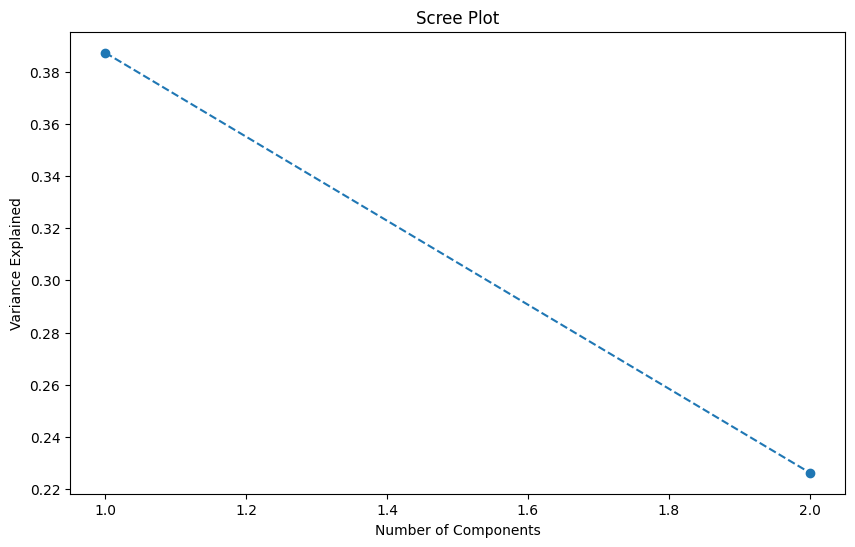

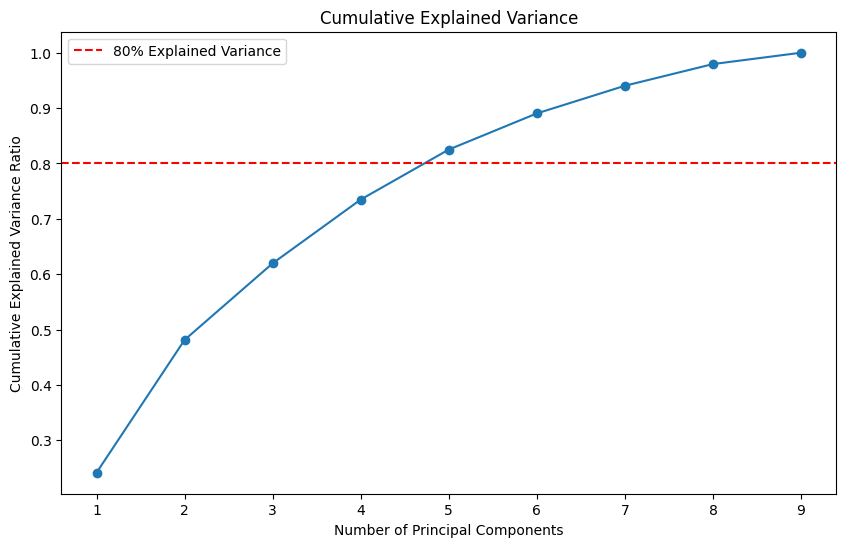

C:\Users\RSMre\AppData\Local\Temp\ipykernel_18164\2949736871.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(loadings_plot['PC1'][i], loadings_plot['PC2'][i], text)


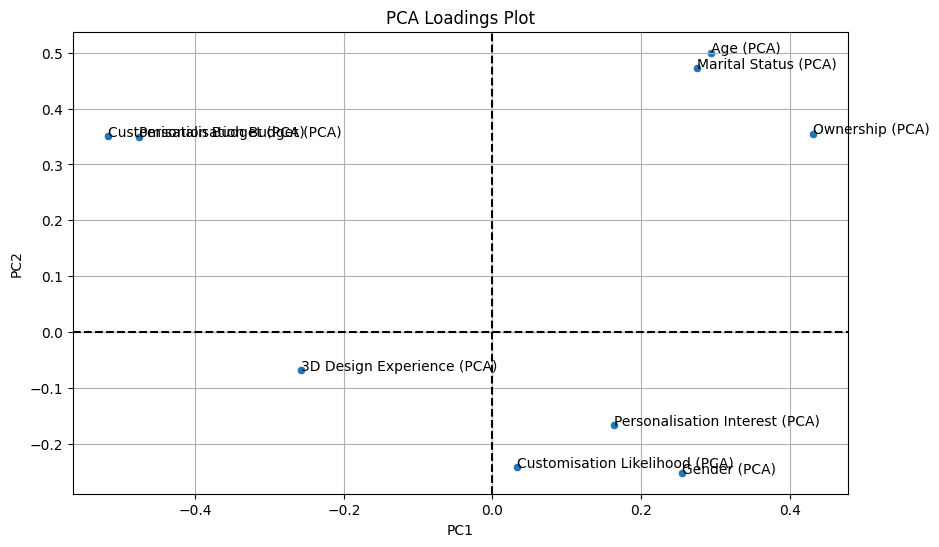

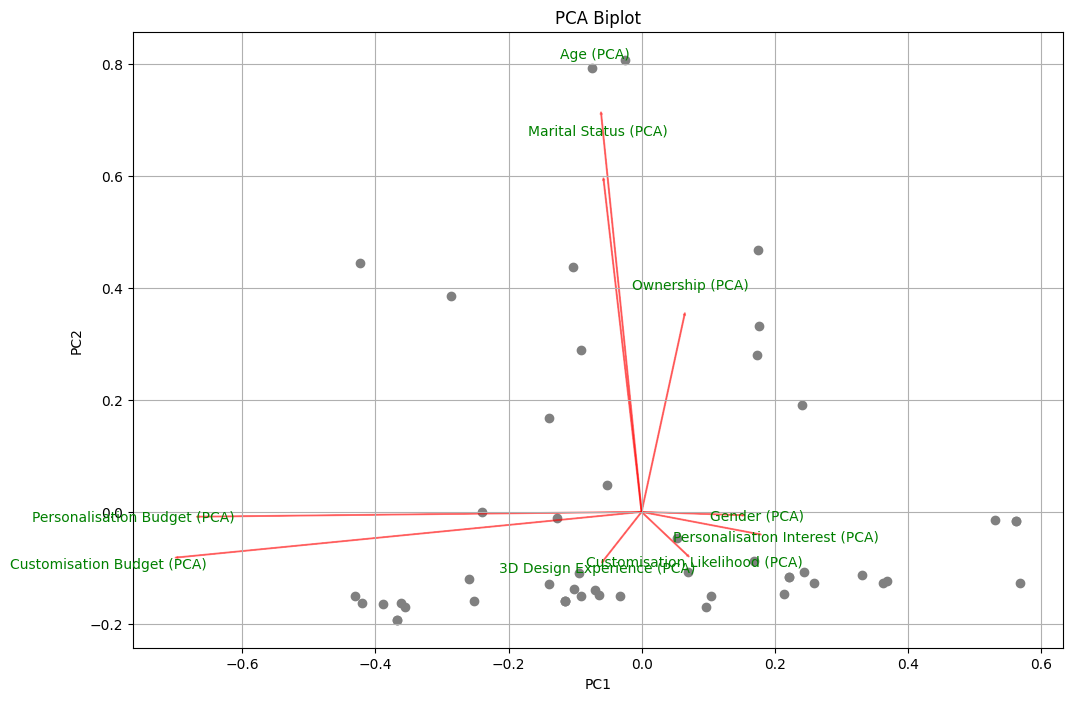

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.show()

# 3. Cumulative Explained Variance Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_complete) + 1), cumulative_variance_complete, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Explained Variance')
plt.legend()
plt.show()

# 2. PCA Loadings Plot for the first two components
plt.figure(figsize=(10, 6))
loadings_plot = loadings.iloc[:, :2]
sns.scatterplot(x=loadings_plot['PC1'], y=loadings_plot['PC2'])
for i, text in enumerate(loadings_plot.index):
    plt.text(loadings_plot['PC1'][i], loadings_plot['PC2'][i], text)
plt.title('PCA Loadings Plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')
plt.grid(True)
plt.show()

# 3. Biplot (for the first two principal components)
def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    plt.scatter(xs * scalex, ys * scaley, c = 'gray')
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color='red',alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, "Var"+str(i+1), color='green', ha='center', va='center')
        else:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, labels[i], color='g', ha='center', va='center')
    
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

# Call the biplot function
plt.figure(figsize=(12, 8))
biplot(principal_components[:, :2], np.transpose(pca.components_[0:2, :]), labels=numerical_data.columns)
plt.title('PCA Biplot')
plt.show()

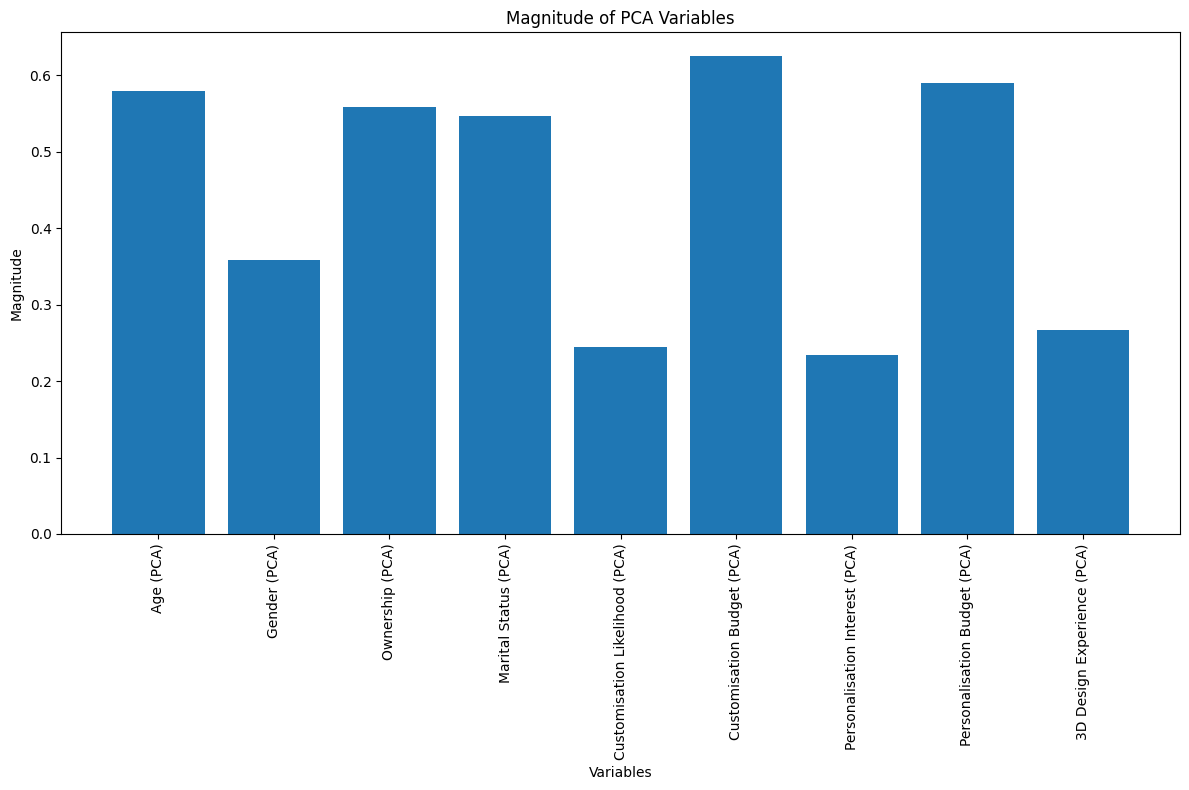

In [35]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming X is your dataset
# Step 1: Standardize the dataset
X_standardized = StandardScaler().fit_transform(numerical_data)
variable_names = numerical_data.columns.tolist()

# Perform PCA
pca = PCA(n_components=2)  # Adjust n_components as needed
X_pca = pca.fit_transform(X_standardized)

# Calculate the magnitude of the loadings
loadings = pca.components_.T  # Transpose to get variables on rows
magnitudes = np.sqrt(np.sum(loadings**2, axis=1))

# Plotting the magnitudes with variable names
plt.figure(figsize=(12, 8))
plt.bar(range(len(variable_names)), magnitudes, tick_label=variable_names)
plt.xticks(rotation=90)  # Rotate variable names for better readability
plt.xlabel('Variables')
plt.ylabel('Magnitude')
plt.title('Magnitude of PCA Variables')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

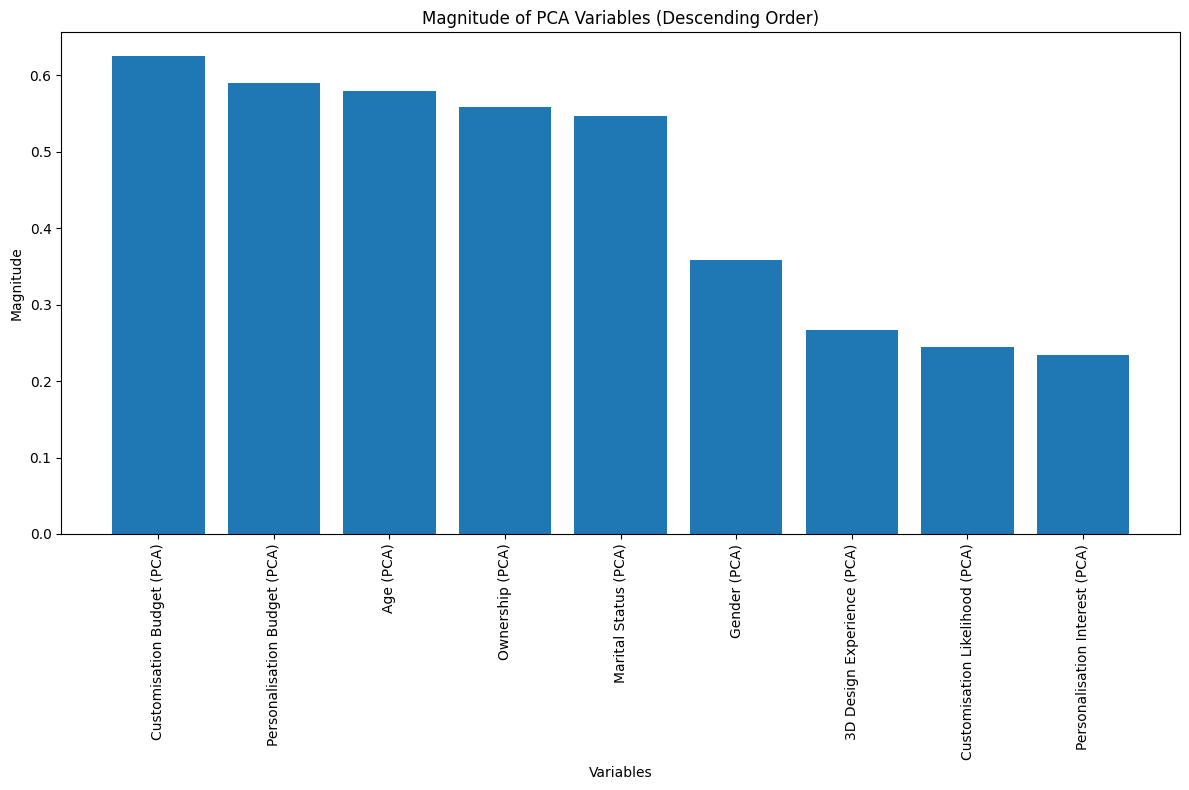

In [36]:
# Create a DataFrame from magnitudes and variable names for sorting
magnitudes_df = pd.DataFrame({'Variable': variable_names, 'Magnitude': magnitudes})

# Sort the DataFrame by 'Magnitude' in descending order
magnitudes_df_sorted = magnitudes_df.sort_values(by='Magnitude', ascending=False)

# Plotting the magnitudes in descending order
plt.figure(figsize=(12, 8))
plt.bar(magnitudes_df_sorted['Variable'], magnitudes_df_sorted['Magnitude'])
plt.xticks(rotation=90)  # Rotate variable names for better readability
plt.xlabel('Variables')
plt.ylabel('Magnitude')
plt.title('Magnitude of PCA Variables (Descending Order)')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

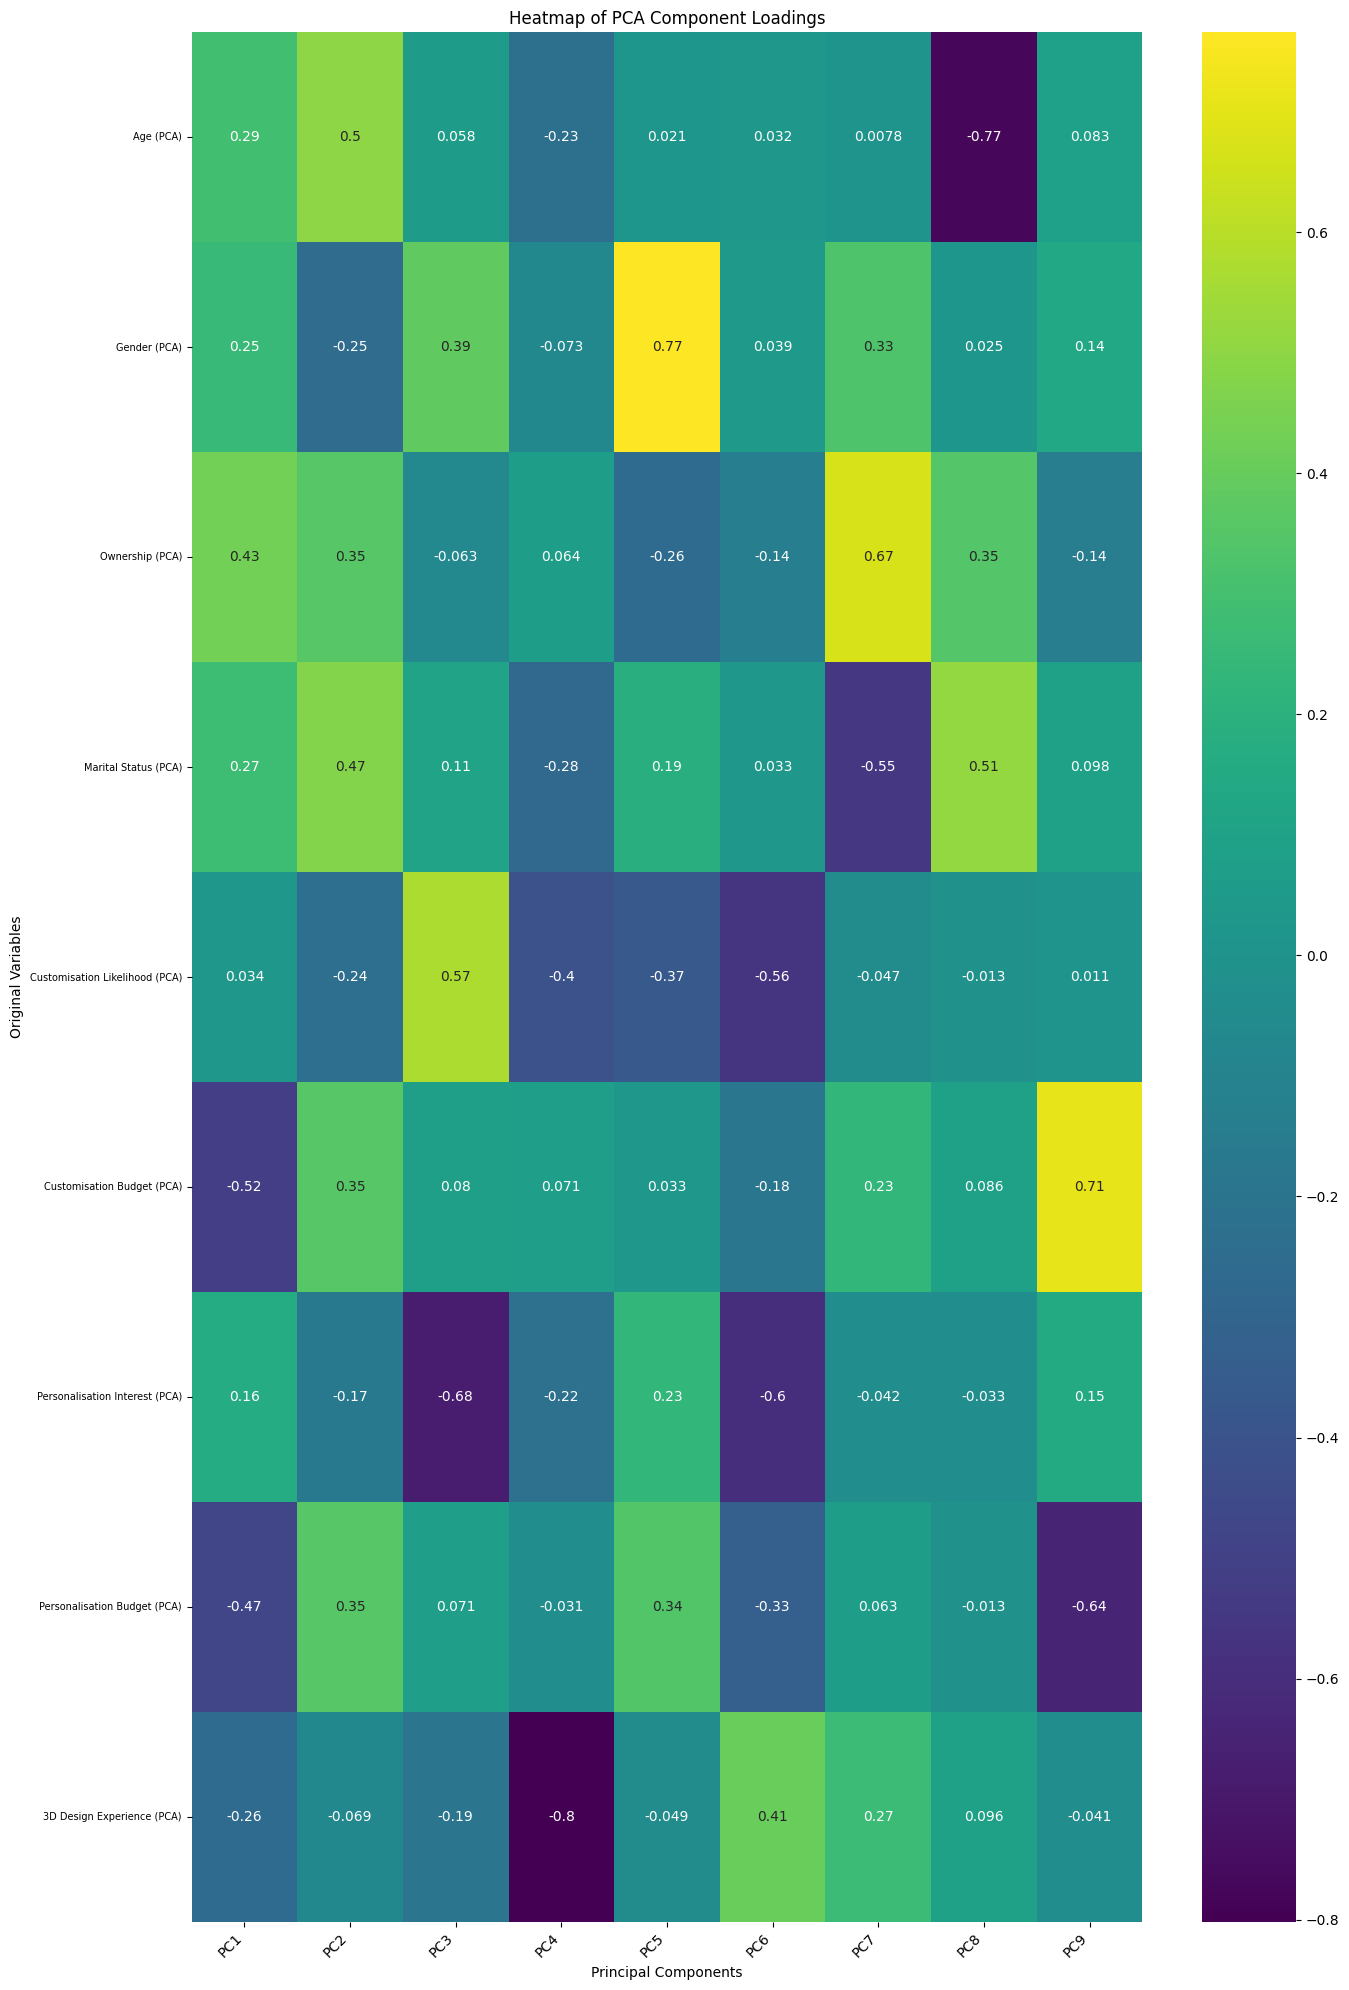

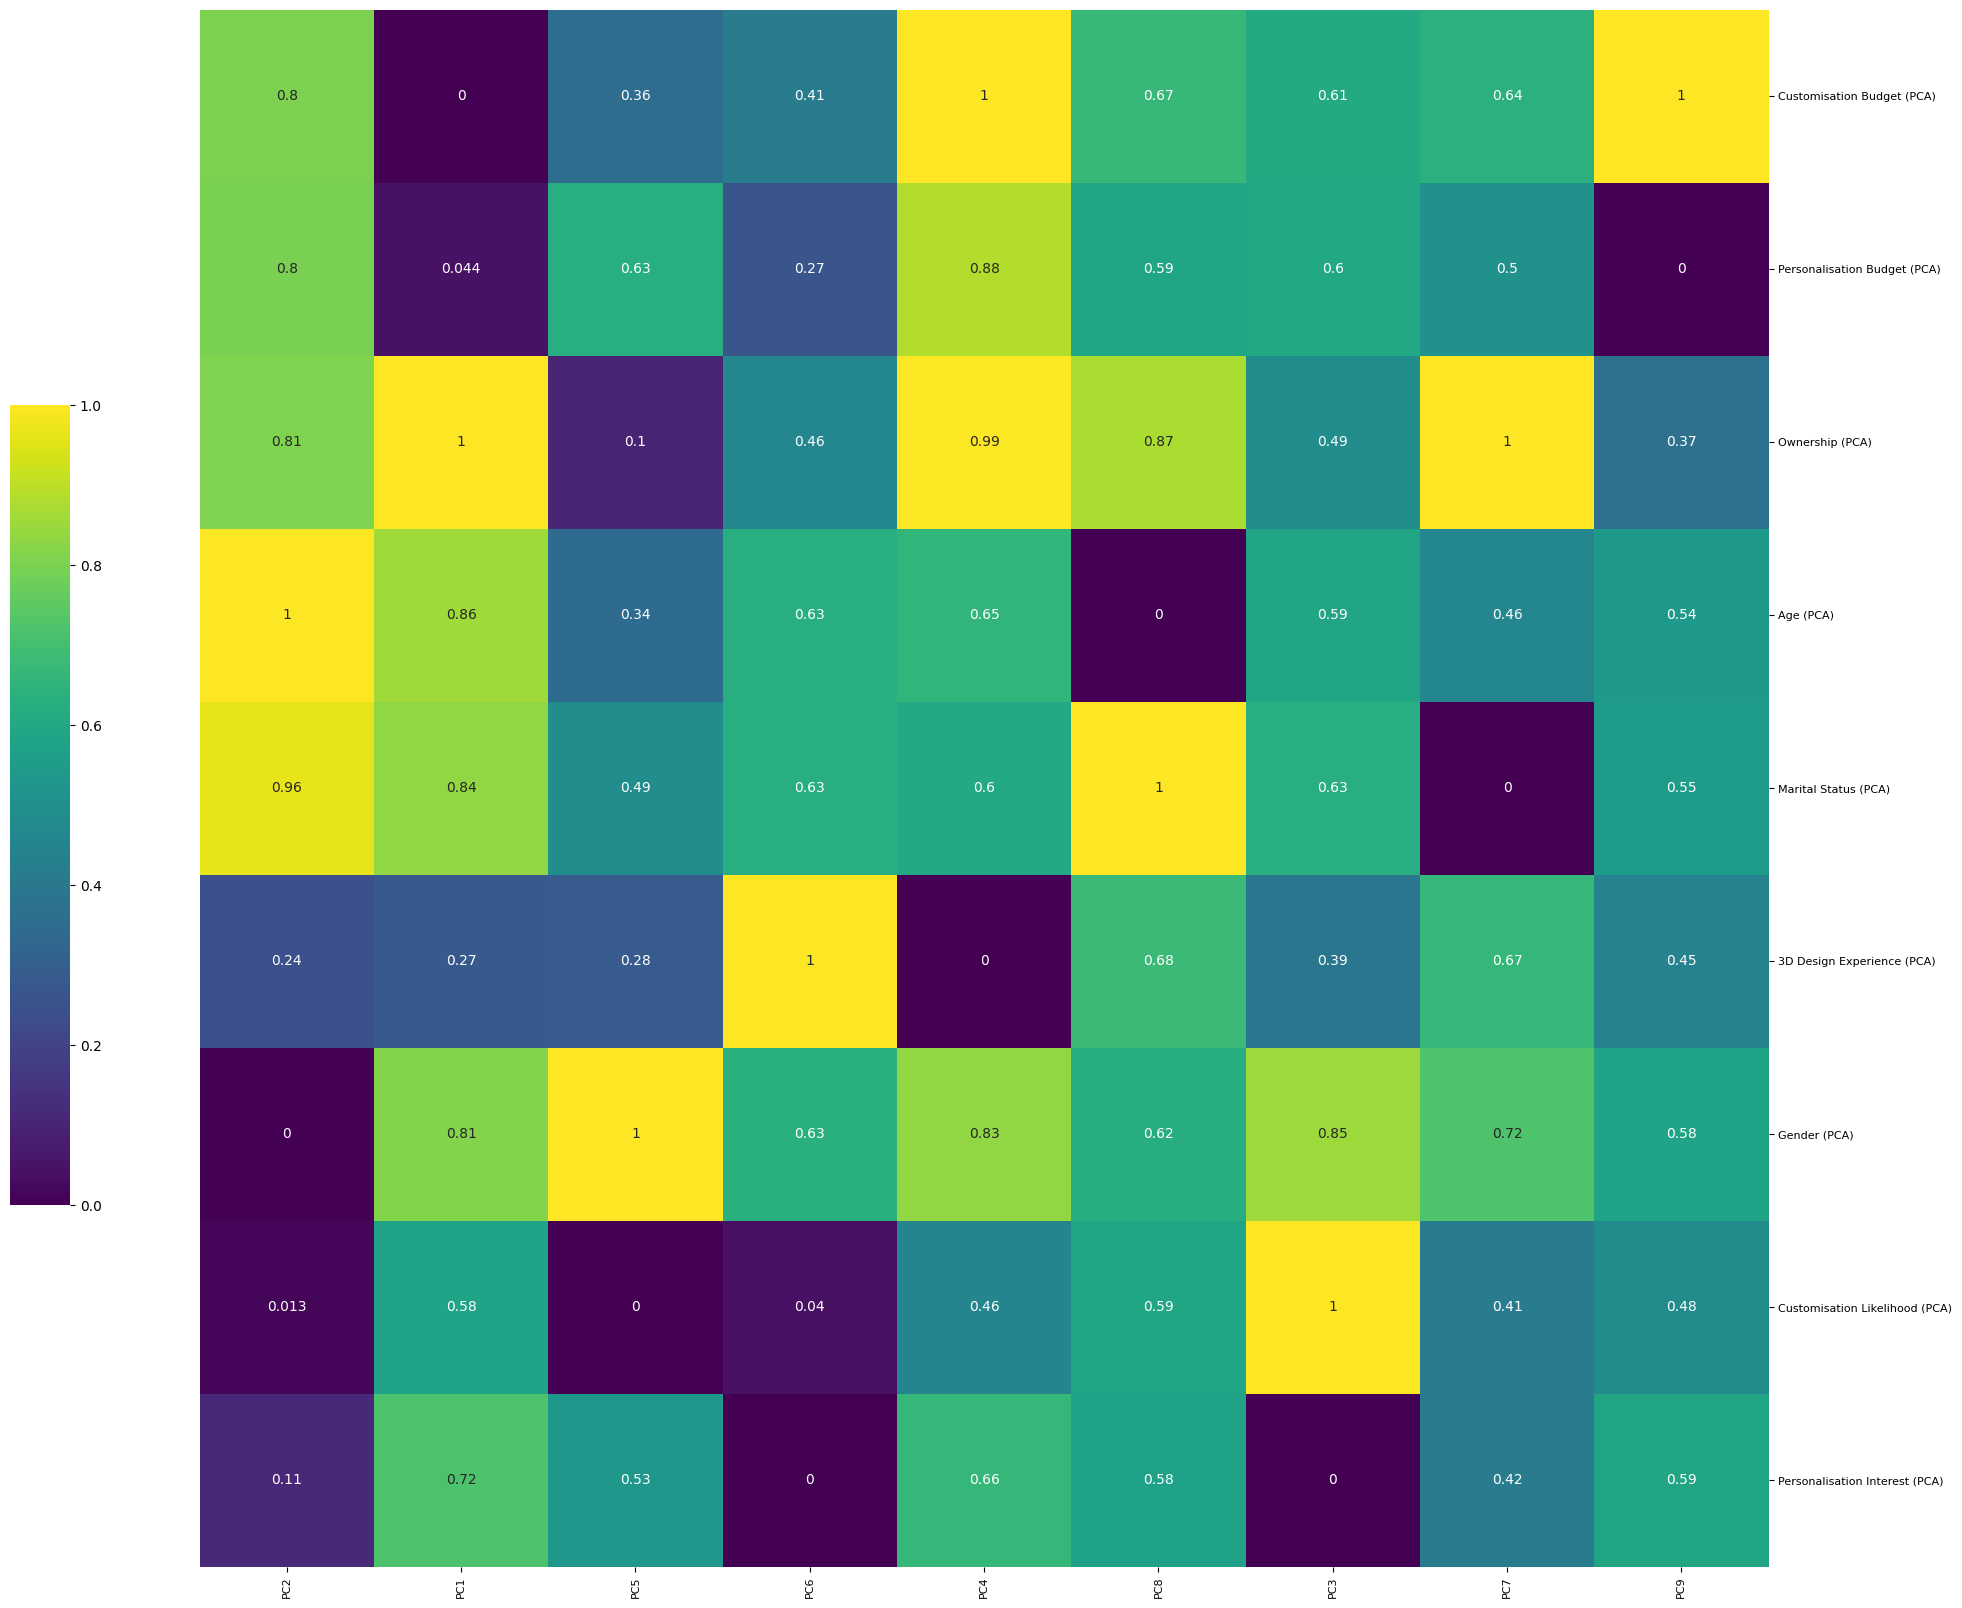

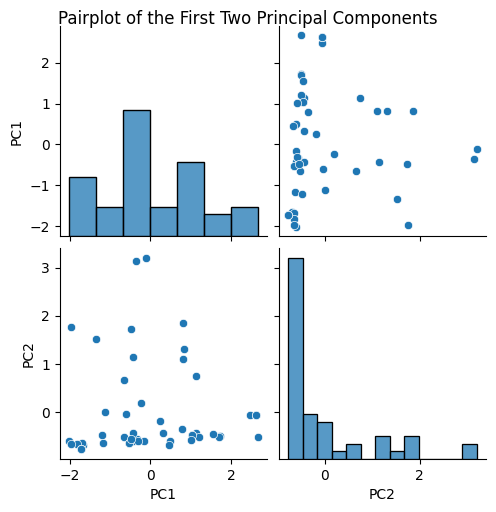

In [42]:
# Assuming the previous variables and PCA results are still in scope
# Convert loadings to a DataFrame if pca_complete is your PCA model and you have the original feature names
loadings = pd.DataFrame(pca_complete.components_.T, columns=[f'PC{i+1}' for i in range(pca_complete.components_.shape[0])], index=numerical_data.columns)

# 1. Heatmap of Component Loadings
plt.figure(figsize=(14, 20))
ax = sns.heatmap(loadings.iloc[:, :10], cmap='viridis', annot=True)
plt.title('Heatmap of PCA Component Loadings')
plt.xlabel('Principal Components')
plt.ylabel('Original Variables')
# Adjustments for improving readability
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better fit
plt.yticks(rotation=0, fontsize=7)  # Adjust font size of y-axis labels
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

# 2. Clustermap
# Adjusting the clustermap size and font size directly in the sns.clustermap() function call
clustermap_fig = sns.clustermap(loadings.iloc[:, :10], cmap='viridis', standard_scale=1, figsize=(20, 20), annot=True, dendrogram_ratio=(.1, .2), cbar_pos=(0, .2, .03, .4))
# To adjust the font size of the labels in the dendrogram, use the `dendrogram_ratio` and `cbar_pos` to make space as needed
clustermap_fig.ax_row_dendrogram.set_visible(False)  # Optionally hide the row dendrogram if space is an issue
clustermap_fig.ax_col_dendrogram.set_visible(False)  # Optionally hide the column dendrogram if space is an issue
# Adjust font size for the heatmap labels (if the above doesn't make them visible or if you need larger text)
plt.setp(clustermap_fig.ax_heatmap.yaxis.get_majorticklabels(), fontsize=8)  # Adjust y-axis labels font size
plt.setp(clustermap_fig.ax_heatmap.xaxis.get_majorticklabels(), fontsize=8, rotation=90)  # Adjust x-axis labels font size and rotation
plt.show()

# 3. Pairplot of the First Few Principal Components
# Note: For large datasets, consider sampling to speed up this plot
sns.pairplot(pd.DataFrame(principal_components[:, :2], columns=['PC1', 'PC2']))
plt.suptitle('Pairplot of the First Two Principal Components', verticalalignment='baseline')
plt.show()

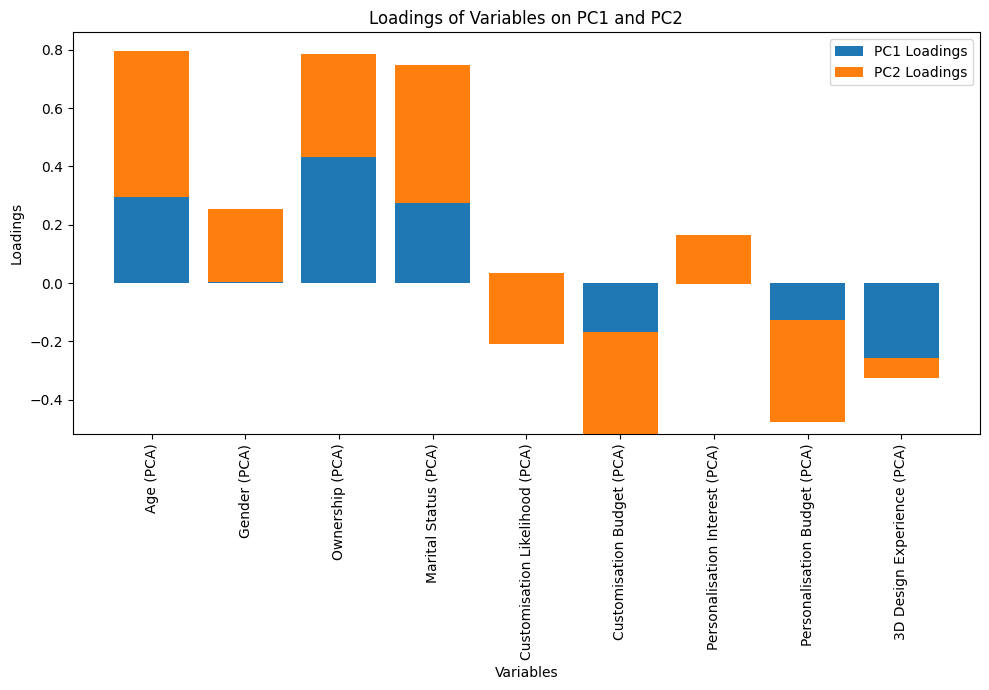

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.bar(loadings.index, loadings['PC1'], label='PC1 Loadings')
plt.bar(loadings.index, loadings['PC2'], bottom=loadings['PC1'], label='PC2 Loadings')
plt.xticks(rotation=90)
plt.ylabel('Loadings')
plt.xlabel('Variables')
plt.title('Loadings of Variables on PC1 and PC2')
plt.legend()
plt.tight_layout()
plt.show()